In [1]:
import os
import json
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import sem
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [9]:
folder = "/Users/gmgao/Dropbox/Caltech_PostDoc_GuttmanLab/constructs_and_smiFISH/constructs-RNF12 mutants"
fname = "mouseRNF12_alphafold_confidence.json"
os.chdir(folder)

# Load the JSON file
with open(fname, "r") as file:  # Replace 'data.json' with your actual JSON file name
    data = json.load(file)

# Extract residue numbers and confidence scores
residue_numbers = data["residueNumber"]
confidence_scores = data["confidenceScore"]

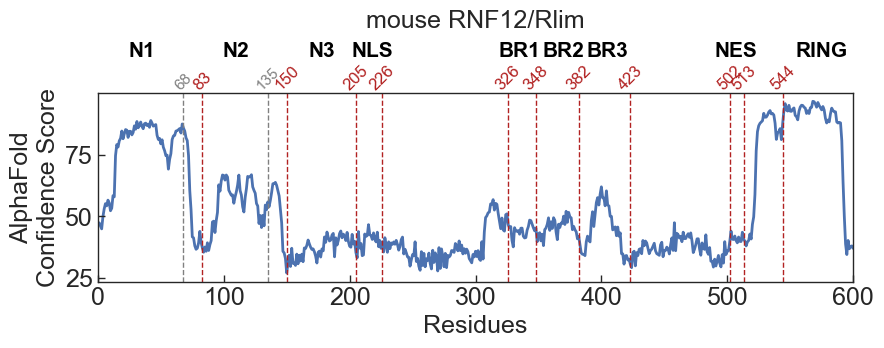

In [86]:
df = pd.DataFrame(
    {"residue_numbers": residue_numbers, "confidence_scores": confidence_scores}
)

plt.figure(figsize=(9, 4))
ax = sns.lineplot(df, x="residue_numbers", y="confidence_scores", lw=2)

used = [83, 150, 205, 226, 326, 348, 382, 423, 502, 513, 544]
for x in used:
    ax.axvline(x=x, color="#b22222", linestyle="--", linewidth=1)  # Add vertical line
    ax.text(
        x,
        ax.get_ylim()[1],
        f"{x}",
        color="#b22222",
        fontsize=12,
        ha="center",
        va="bottom",
        rotation=45,
    )  # Add label at the top of the plot

not_used = [68, 135]
for x in not_used:
    ax.axvline(x=x, color="gray", linestyle="--", linewidth=1)  # Add vertical line
    ax.text(
        x,
        ax.get_ylim()[1],
        f"{x}",
        color="gray",
        fontsize=11,
        ha="center",
        va="bottom",
        rotation=45,
    )  # Add label at the top of the plot

labels = ["N1", "N2", "N3", "NLS", "BR1", "BR2", "BR3", "NES", "RING"]
labels_x = [35, 110, 178, 218, 335, 370, 405, 507, 575]
for x, text in zip(labels_x, labels):
    ax.text(
        x,
        ax.get_ylim()[1] + 13,
        text,
        color="black",
        fontsize=15,
        fontweight="bold",
        ha="center",
        va="bottom",
    )  # Add label at the top of the plot

plt.xlim(0, residue_numbers[-1])
plt.ylabel("AlphaFold\nConfidence Score", fontsize=18)
plt.xlabel("Residues", fontsize=18)
plt.title("mouse RNF12/Rlim", fontsize=18, y=1.3)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

plt.tight_layout()
plt.savefig(
    "AlphaFold_confidence_score-RNF12.png", format="png", bbox_inches="tight", dpi=300
)